# Judi's Project
This project is using the publicly available data from the Human Connectome Project (HCP)

Data available here: https://db.humanconnectome.org
Data dictionary available here: https://wiki.humanconnectome.org/display/PublicData/HCP+Data+Dictionary+Public-+500+Subject+Release?src=contextnavpagetreemode

Test whether performance differences in a line orientation task are explained:  
*) gender
*) characteristics of hippocampus (area, volume, surface) 

For this: 
*) extract appropriate data and save in pandas data frame
*) plot distribution of spatial orientation performance
*) create score for left and right hippocampal area for each person
*) normalise hippocampal area for each person
*) plot all possible combinations
*) check assumptions
*) linear regression 

NECESSARY:

    load source data from a file [X]
    plot at least one histogram of the data, with title and labelled axes [X]
    create at least one plot of analysis results, with title and labelled axes
    use at least one numpy array [X]
    use short but descriptive variable names in your code [X}
    document your code: use markdown in your .ipynb and/or directly comment your python code with # or ''' or """ [X]

MINIMUM OF SIX:

    use an if-elif-else clause
    use a for loop [X}
    use a while loop
    write at least one function, include a docstring
    print out some results in at least one nicely formatted string, using string operator % or .format() method
    use at least one vectorized math operation on an array [X]
    use at least one matrix operation on a 2D array
    create a figure with multiple axes (i.e., use plt.subplots(nrows, ncols))
    do a statistical test - show that the test assumptions hold for your data
    manipulate and analyze data in a pandas series or dataframe [X]
    use an image processing algorithm
    use a clustering algorithm
    use some other non-trivial algorithm: e.g. regression, curve fitting, signal analysis…
    version control your code using git: create a local repository and make at least 5 commits while developing your code


In [1]:
#Load packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Load data from source file
HCP_data = pd.read_csv('C:/Users/Judi/Documents/Project_HCP/unrestricted_jhuber_6_23_2017_7_25_10.csv')
#HCP_data = pd.read_csv('C:/Users/Judita/HCP_Data/unrestricted_jhuber_7_24_2017_4_28_55.csv')
HCP_data.shape

(1206, 573)

In [4]:
#Group data by Gender
gender_grouping = HCP_data.groupby('Gender')

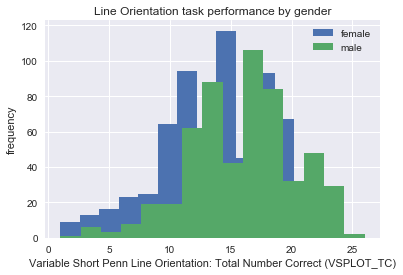

In [5]:
#plot at least one histogram of the data, with title and labelled axes
gender_hist = gender_grouping.VSPLOT_TC.hist(bins=15)
plt.xlabel("Variable Short Penn Line Orientation: Total Number Correct (VSPLOT_TC)")
plt.ylabel("frequency")
plt.title("Line Orientation task performance by gender")
plt.legend(('female', 'male'))


In [14]:
#select appropriate columns (i.e. gender, age, task performance and hippocampal & temporal lobe information)
filter_col = [col for col in HCP_data.columns 
            if col.startswith('FS_L_Parahippocampal') | 
            col.startswith('FS_R_Parahippocampal') |
            col.startswith('FS_L_Hipp') | 
            col.startswith('FS_R_Hipp') |
            col.startswith('Age') |
            #col.startswith('IWRD_TOT') |
            col.startswith('VSPLOT_TC') |
            col.startswith('Gender')  |
            col.startswith('PercStress') |
             col.startswith('FS_SubCort_GM')]
filter_col



['Gender',
 'Age',
 'VSPLOT_TC',
 'PercStress_Unadj',
 'FS_SubCort_GM_Vol',
 'FS_L_Hippo_Vol',
 'FS_R_Hippo_Vol',
 'FS_L_Parahippocampal_Thck',
 'FS_R_Parahippocampal_Thck',
 'FS_L_Parahippocampal_Area',
 'FS_R_Parahippocampal_Area']

In [45]:
#filter data 
HCP_data_f = HCP_data[filter_col] #use filter in data frame to select specified columns

#exclude empty entries (otherwise get error message later)
HCP_data_f = HCP_data_f[~HCP_data_f.FS_L_Hippo_Vol.isnull()]
HCP_data_f = HCP_data_f[~HCP_data_f.FS_R_Hippo_Vol.isnull()]
HCP_data_f = HCP_data_f[~HCP_data_f.FS_SubCort_GM_Vol.isnull()]
HCP_data_f = HCP_data_f[~HCP_data_f.VSPLOT_TC.isnull()]
HCP_data_f.shape #check that correct shape 




(1105, 11)

In [46]:
#create composite scores to determine 
# *) total hippocampal volume 
# *) normalised hippocampal volume 

#normalise hippocampal volume by dividing by total subcortical grey matter volume
FS_L_Hippo_Vol_norm = np.array(HCP_data_f.FS_L_Hippo_Vol / HCP_data_f.FS_SubCort_GM_Vol) #left hippocampus
FS_R_Hippo_Vol_norm = np.array(HCP_data_f.FS_R_Hippo_Vol / HCP_data_f.FS_SubCort_GM_Vol) #right hippocampus
FS_R_Hippo_Vol_norm.size

#calculate total hippocampal volume
FS_HPCvol_sum = np.array(HCP_data_f.FS_R_Hippo_Vol + HCP_data_f.FS_L_Hippo_Vol)
#calculate total normalised hippocampal volume
FS_HPCvol_sum_norm = np.array(FS_HPCvol_sum / HCP_data_f.FS_SubCort_GM_Vol)

#include arrays in data frame
HCP_data_f['FS_L_Hippo_Vol_norm'] = FS_L_Hippo_Vol_norm
HCP_data_f['FS_R_Hippo_Vol_norm'] = FS_R_Hippo_Vol_norm
HCP_data_f['FS_HPCvol_sum'] = FS_HPCvol_sum
HCP_data_f['FS_HPCvol_sum_norm'] = HCP_data_f.FS_HPCvol_sum / HCP_data.FS_SubCort_GM_Vol 

#check
HCP_data_f.shape 



(1105, 15)

In [ ]:
#create at least one plot of analysis results, with title and labelled axes

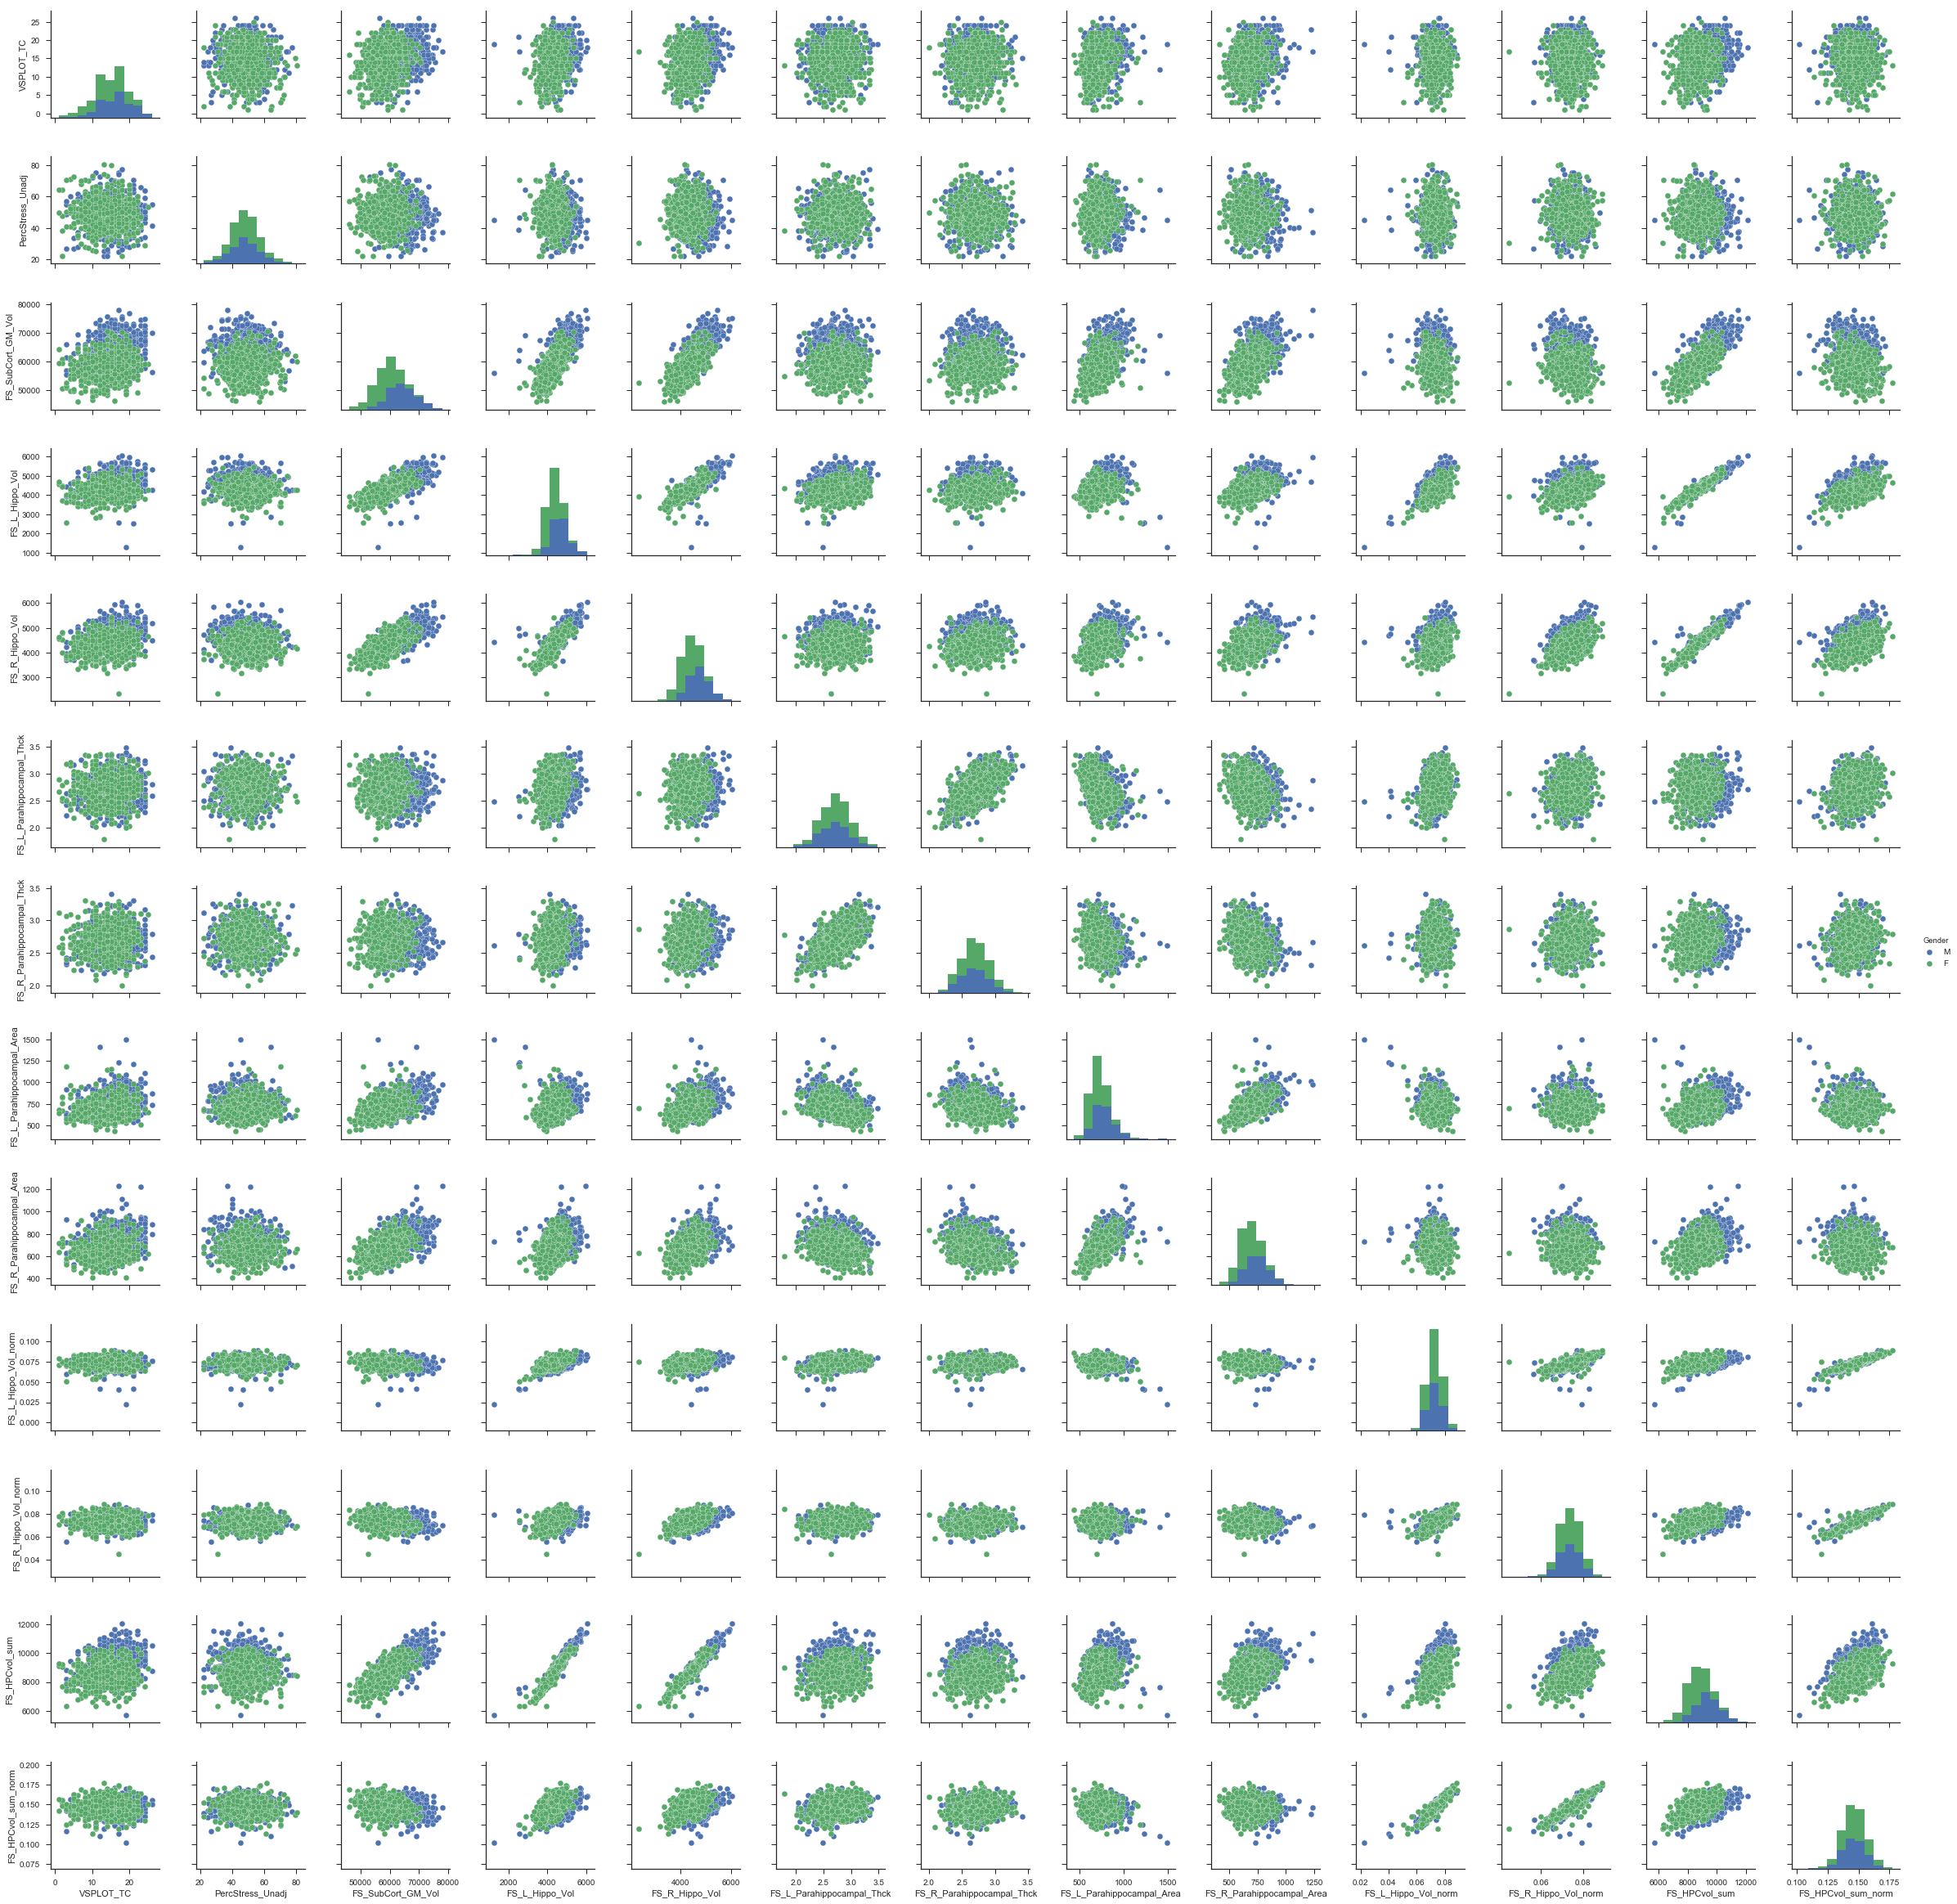

In [47]:
#create at least one plot of analysis results, with title and labelled axes
sns.set(style="ticks")
sns.pairplot(HCP_data_f,  dropna=True, hue = "Gender")

In [ ]:
# write own function

In [ ]:
#use at least one numpy array

    use an if-elif-else clause 
    use a for loop X
    use a while loop
    write at least one function, include a docstring
    print out some results in at least one nicely formatted string, using string operator % or .format() method
    use at least one vectorized math operation on an array 
    use at least one matrix operation on a 2D array X
    create a figure with multiple axes (i.e., use plt.subplots(nrows, ncols)) X
    do a statistical test - show that the test assumptions hold for your data TO DO
    manipulate and analyze data in a pandas series or dataframe X
    use an image processing algorithm
    use a clustering algorithm
    use some other non-trivial algorithm: e.g. regression, curve fitting, signal analysis… X 
    version control your code using git: create a local repository and make at least 5 commits while developing your code X


In [ ]:
# select which variable 